<a href="https://colab.research.google.com/github/bassemr/pytorch_learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [3]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


2.5.1+cu121


In [5]:
device

'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

> Add blockquote



## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
# Setup Training data
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader

train_data = datasets.MNIST(
    root=".",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root=".",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 492kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.06MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [7]:
len(train_data), len(test_data)

(60000, 10000)

In [8]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [9]:
image, label = train_data[0]
image.dtype, label

(torch.float32, 5)

In [10]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [11]:
class_names[5]

'5 - five'

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([1, 28, 28])


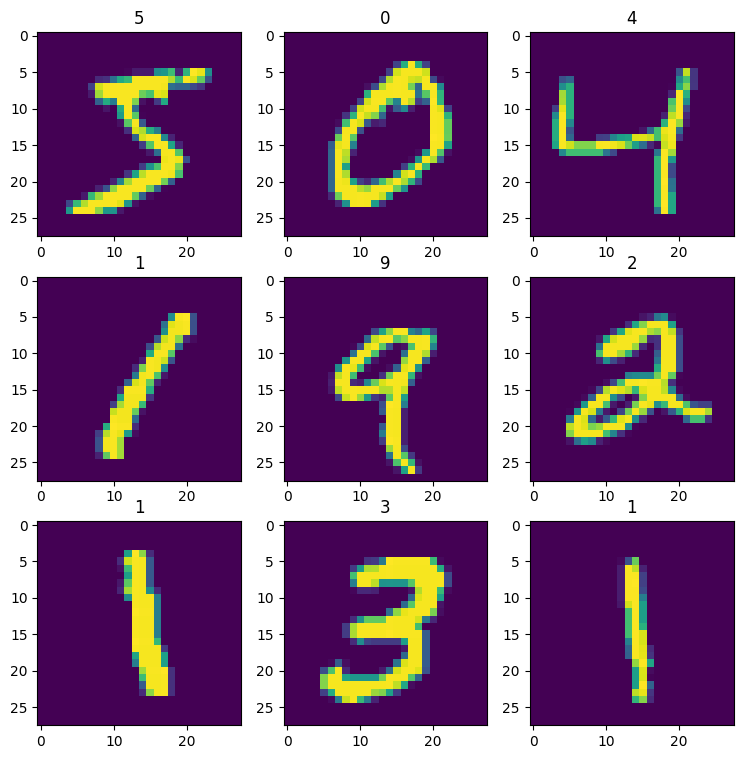

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))
for i in range(9):
  image, label = train_data[i]
  plt.subplot(3, 3, i+1)
  print(f"Image shape: {image.shape}")
  plt.imshow(image.squeeze())
  plt.title(label)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
import torch
torch.manual_seed(42)
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fcc9d7bf490>,
 <torch.utils.data.dataloader.DataLoader at 0x7fcc9d7ddf60>)

In [14]:
print(f"Length of train_dataloader: {len(train_dataloader)}, batches of {BATCH_SIZE}")
print(f"Length of test_Dataloader: {len(test_dataloader)}, batches of {BATCH_SIZE}")


Length of train_dataloader: 1875, batches of 32
Length of test_Dataloader: 313, batches of 32


In [15]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [16]:
import torch
from torch import nn

class MNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            padding=1,
            stride=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
          out_channels=hidden_units,
          kernel_size=3,
          stride=1,
          padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units * 7 * 7,
                  out_features=output_shape)
    )


  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x



In [17]:
model = MNISTModel(input_shape=1,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)
model

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [18]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skipping download...")
else:
  print("Download helper_function.py")
  request = requests.get(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open(file="helper_function.py", mode="wb") as f:
    f.write(request.content)


Download helper_function.py


In [19]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [20]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [21]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0, 0

  model.train()

  for barch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")





In [22]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")


In [23]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}


In [24]:
from tqdm.auto import tqdm

torch.manual_seed(42)


train_time_start = timer()

epochs = 5
for epoch in tqdm(range(epochs), desc="Training..."):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             device=device)
  test_step(model=model,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end = timer()

total_time = print_train_time(start=train_time_start,
                              end=train_time_end,
                              device=device)





Training...:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.4804 | Train acc: 83.07%
Test Loss: 0.0757 | Test acc: 97.68%
Epoch: 1
--------
Train loss: 0.0761 | Train acc: 97.65%
Test Loss: 0.0509 | Test acc: 98.33%
Epoch: 2
--------
Train loss: 0.0550 | Train acc: 98.30%
Test Loss: 0.0539 | Test acc: 98.30%
Epoch: 3
--------
Train loss: 0.0454 | Train acc: 98.55%
Test Loss: 0.0421 | Test acc: 98.54%
Epoch: 4
--------
Train loss: 0.0392 | Train acc: 98.78%
Test Loss: 0.0445 | Test acc: 98.66%
Train time on cpu: 324.998 seconds


In [25]:
rand_image_tensor = torch.randn(size=(1, 28, 28)).to(device)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [26]:
model(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ -6.3888,  -1.6939,  10.2127,  13.1786, -10.7839,  -0.0805,  -2.2630,
           1.8850,  -0.4264,  -0.8571]], grad_fn=<AddmmBackward0>)

In [27]:
model_results = eval_model(model=model,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn,
                          device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [28]:
model_results

{'model_name': 'MNISTModel',
 'model_loss': 0.04451633244752884,
 'model_acc': 98.66214057507987}

In [29]:
import pandas as pd
model_df = pd.DataFrame([model_results])
model_df["training_time"] = total_time
model_df

,model_name,model_loss,model_acc,training_time
0,MNISTModel,0.044516,98.662141,324.99804


Text(0, 0.5, 'Model')

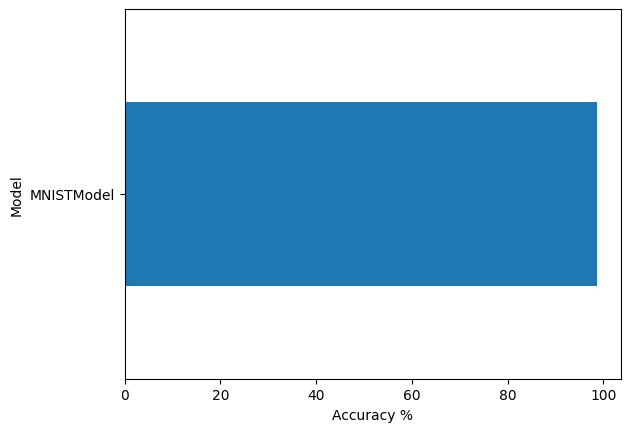

In [30]:
model_df.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy %")
plt.ylabel("Model")

In [31]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)


In [44]:
import random
# random.seed(42)
test_samples, test_labels = [], []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

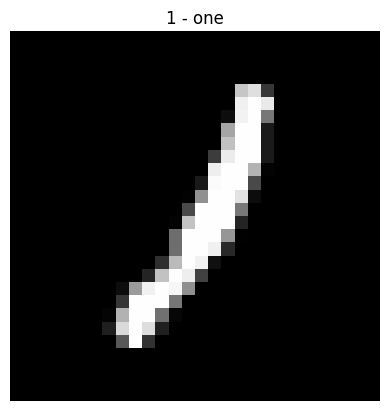

In [45]:
plt.imshow(test_samples[0].squeeze(0), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis("off")

In [46]:
# Make predictions
pred_probs = make_predictions(model=model,
                              data=test_samples,
                              device=device)
# View first two prediction probablities

In [47]:
test_labels, pred_probs.argmax(dim=1)

([1, 2, 8, 9, 0, 1, 2, 8, 8], tensor([1, 2, 8, 9, 0, 1, 2, 8, 8]))

In [48]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 2, 8, 9, 0, 1, 2, 8, 8])

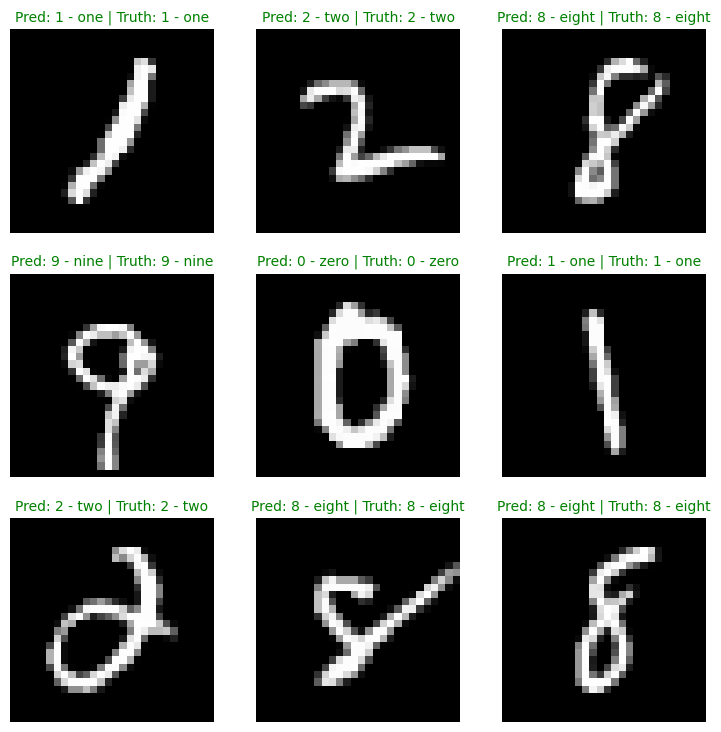

In [49]:
plt.figure(figsize=(9, 9))
for i, sample in enumerate(test_samples):
  plt.subplot(3, 3, i+1)
  plt.imshow(sample.squeeze(dim=0), cmap="gray")
  pred_label =class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if truth_label == pred_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis("off")


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [50]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend

  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split("."))[1] >= 19, "mlxtedn version should be 0.19.0 or higher"
except:
  print("Instaling..")
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")



Instaling..
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 17.1 MB/s eta 0:00:00
mlxtend version: 0.23.3


In [54]:
import mlxtend
from tqdm.auto import tqdm


# 1. Make a predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and tagets to target device
    X, y = X.to(device), y.to(device)
    # Do the fotward pass
    y_logits = model(X)
    # Turn predictions from logits -> prediction probabilities
    y_pred = torch.softmax(y_logits.squeeze(), dim=1).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

print(y_pred_tensor)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])


In [64]:
import numpy as np
wrong_pred = np.where(y_pred_tensor != test_data.targets)
len(wrong_pred)

1

In [63]:
plt.figure(figsize=(9, 9))
for i, sample in enumerate(random_selection):
  plt.subplot(3, 3, i+1)
  plt.imshow(sample.squeeze(dim=0), cmap="gray")
  pred_label =class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if truth_label == pred_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis("off")


NameError: name 'random_selection' is not defined

<Figure size 900x900 with 0 Axes>

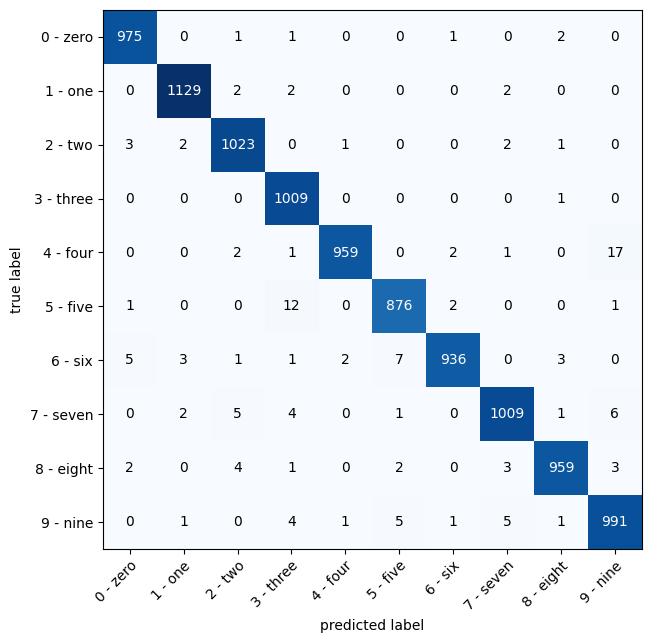

In [55]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)

)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?